# Problem Statement
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing



In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [3]:
data=pd.read_csv('Fraud_check.csv')

In [4]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA & Data Preprocessing

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
data["Taxable.Income"] = np.where((data["Taxable.Income"]<30000), "Risky", "Good")


In [10]:
data["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

### **One** **hot** **Encoding**

In [11]:
data1=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'], drop_first=False)
data1


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


## **Pairplot**

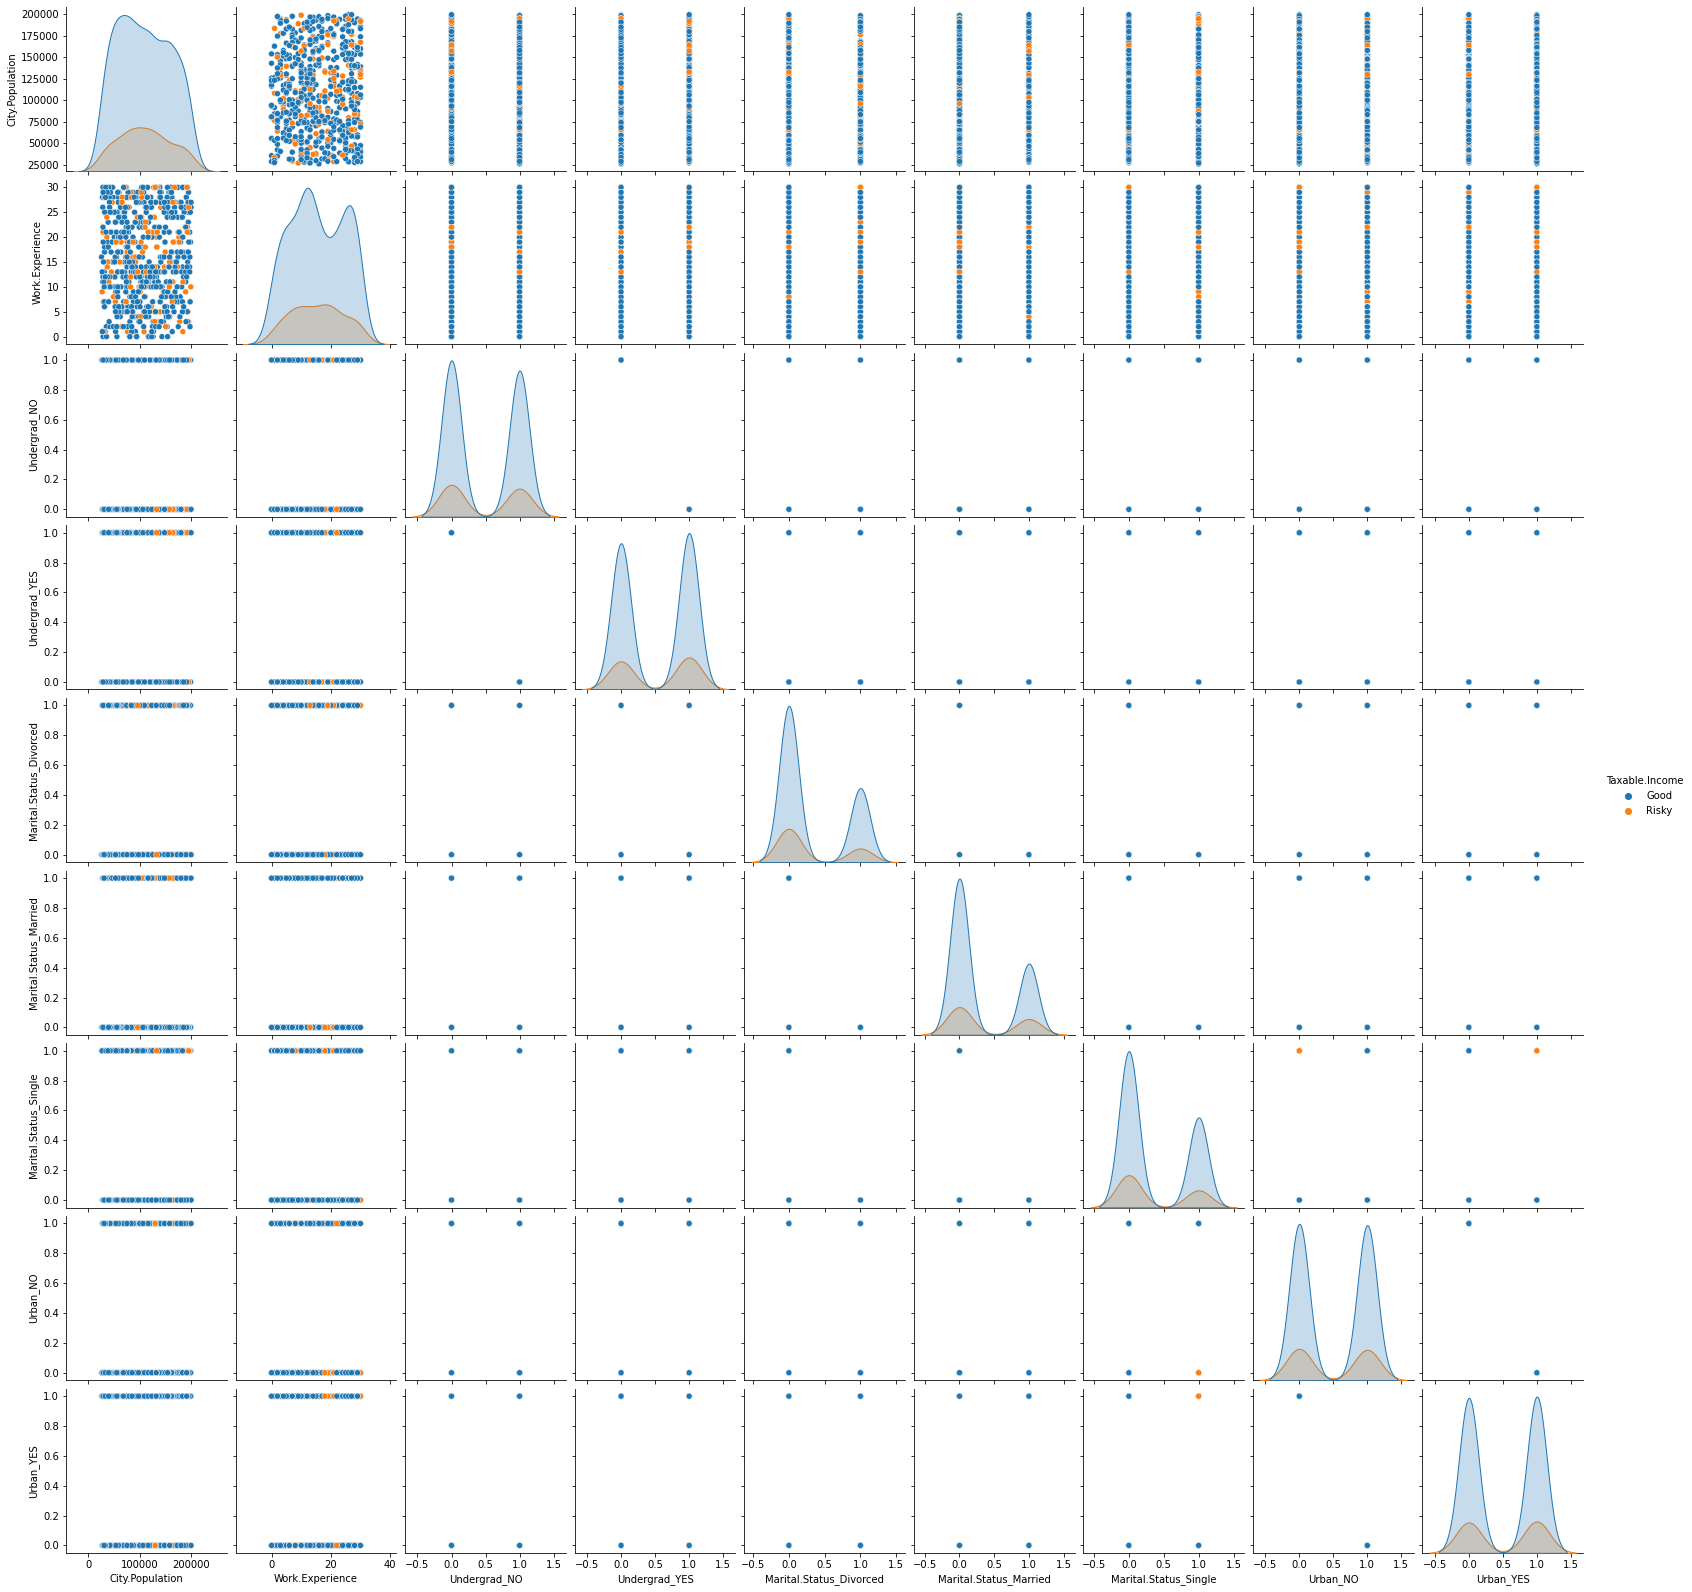

In [12]:
import seaborn as sns
sns.pairplot(data=data1, hue = 'Taxable.Income')


# Encoding "Taxable.Income"

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labeled= LabelEncoder().fit_transform(data1["Taxable.Income"])
labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
data1["Taxable.Income"]=labeled
data1


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


## **Normalization** **function**

In [16]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

data_norm = norm_func(data1)
data_norm.tail(10)


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
590,0.0,0.341473,0.466667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
591,1.0,0.615406,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
592,0.0,0.283703,0.533333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
593,0.0,0.610256,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
594,0.0,0.412341,0.300000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
595,0.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
599,0.0,0.760683,0.533333,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
X = data_norm.drop(['Taxable.Income'], axis=1)
Y = data_norm['Taxable.Income']


# Builiding Decision Tree classifier using Entropy Criteria

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

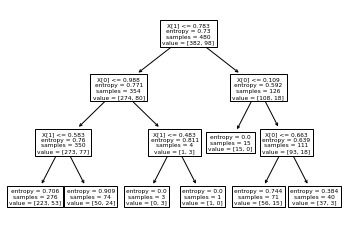

In [22]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

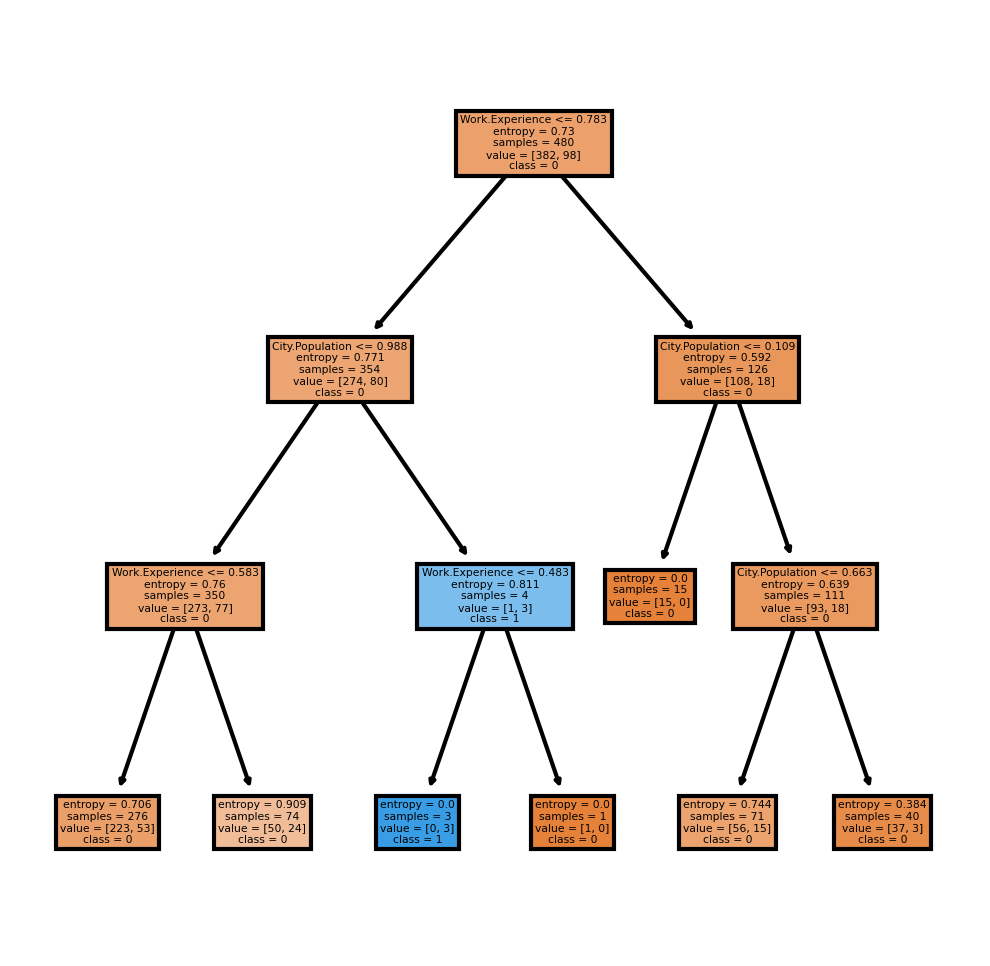

In [23]:
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = X.columns, 
               class_names=cn,
               filled = True);


In [25]:
#Predicting on train data
preds = model.predict(X_train) # predicting on train data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    477
1.0      3
dtype: int64

In [26]:
Y_train.value_counts()

0.0    382
1.0     98
Name: Taxable.Income, dtype: int64

In [27]:
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
pd.crosstab(Y_train,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
Taxable.Income,,
0.0,382,0
1.0,95,3


In [30]:
# Accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,preds)

0.8020833333333334

In [31]:
np.mean(preds==Y_train)

0.8020833333333334

# Building Decision Tree Classifier using gini Criteria


In [32]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [33]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
#Prediction and computing the accuracy
pred=model.predict(X_train)
np.mean(preds==Y_train)

0.8020833333333334

# And aslo done Hyperparameter Tunning for Decision tree classifier to know the best Parameter


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, Y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, Y_train)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 79.58%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0   1.0  accuracy   macro avg  weighted avg
precision    0.795833   0.0  0.795833    0.397917      0.633351
recall       1.000000   0.0  0.795833    0.500000      0.795833
f1-score     0.886311   0.0  0.795833    0.443155      0.705356
support    382.000000  98.0  0.795833  480.000000    480.000000
_______________________________________________
Confusion Matrix: 
 [[382   0]
 [ 98   0]]

Test Result:
Accuracy Score: 78.33%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0   1.0  accuracy   macro avg  weighted avg
precision   0.783333   0.0  0.783333    0.391667      0.613611
recall      1.000000   0.0  0.783333    0.500000      0.783

# Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor


In [38]:
model3 = DecisionTreeRegressor(max_depth=3)
model3.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=3)

In [39]:
#Find the mse
from sklearn import metrics
p=model3.predict(X_test)
metrics.mean_squared_error(Y_test,p)



0.18487900718620792

In [40]:
np.mean(Y_test==p)

0.025

For decision Tree Regression model is not performing Good.